In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [161]:
x=pd.read_csv("survey_results_public.csv",  low_memory=True)

E:\Anacondafiles\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
y=pd.read_csv("survey_results_schema.csv", low_memory=True)

In [8]:
x.head(5)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [9]:
y.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."


In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


In [13]:
x.isnull().sum()

Respondent           0
Hobby                0
OpenSource           0
Country            412
Student           3954
                 ...  
Age              34281
Dependents       36259
MilitaryUS       83074
SurveyTooLong    32914
SurveyEasy       32976
Length: 129, dtype: int64

In [14]:
y.isna().sum()

Column          0
QuestionText    0
dtype: int64

In [15]:

y.set_index("Column", inplace=True)

In [22]:
y["QuestionText"]

Column
Respondent       Randomized respondent ID number (not in order ...
Hobby                                      Do you code as a hobby?
OpenSource              Do you contribute to open source projects?
Country                  In which country do you currently reside?
Student          Are you currently enrolled in a formal, degree...
                                       ...                        
Age              What is your age? If you prefer not to answer,...
Dependents       Do you have any children or other dependents t...
MilitaryUS       Are you currently serving or have you ever ser...
SurveyTooLong    How do you feel about the length of the survey...
SurveyEasy       How easy or difficult was this survey to compl...
Name: QuestionText, Length: 129, dtype: object

In [35]:
x.loc[[0,1],["Country","Hobby"]]

,Country,Hobby
0,Kenya,Yes
1,United Kingdom,Yes


In [44]:
x.loc[[0],["Country","Student"]]

,Country,Student
0,Kenya,No


In [45]:
x[["Country","Student"]]

,Country,Student
0,Kenya,No
1,United Kingdom,No
2,United States,No
3,United States,No
4,South Africa,"Yes, part-time"
...,...,...
98850,United States,NaN
98851,Spain,"Yes, full-time"
98852,India,"Yes, full-time"
98853,Russian Federation,No


In [46]:
x.isna().sum()

Respondent           0
Hobby                0
OpenSource           0
Country            412
Student           3954
                 ...  
Age              34281
Dependents       36259
MilitaryUS       83074
SurveyTooLong    32914
SurveyEasy       32976
Length: 129, dtype: int64

In [50]:
x["Age"].fillna(value="None",inplace=True)

In [51]:
x["Age"]

0        25 - 34 years old
1        35 - 44 years old
2                     None
3        35 - 44 years old
4        18 - 24 years old
               ...        
98850                 None
98851                 None
98852                 None
98853                 None
98854                 None
Name: Age, Length: 98855, dtype: object

In [54]:
np.array(x.columns)

array(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student',
       'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction',
       'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus',
       'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3',
       'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7',
       'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1',
       'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4',
       'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7',
       'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10',
       'AssessBenefits11', 'JobContactPriorities1',
       'JobContactPriorities2', 'JobContactPriorities3',
       'JobContactPriorities4', 'JobContactPriorities5',
       'JobEmailPriorities1', 'JobEmailPriorities2',
       'JobEmailPriorities3', 'JobEmailPriorities4',
       'JobEmailPriorities5', 'JobEmailPriorities6',
       'JobE

In [55]:
x["Country"].value_counts()

United States     20309
India             13721
Germany            6459
United Kingdom     6221
Canada             3393
                  ...  
Guinea-Bissau         1
Timor-Leste           1
Belize                1
Burundi               1
Mali                  1
Name: Country, Length: 183, dtype: int64

For convinence, we have only displayed the top five countries
To get a broader picture, we can create a barplot

<AxesSubplot:>

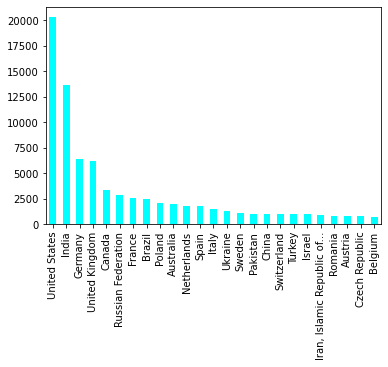

In [58]:
x["Country"].value_counts().head(25).plot(kind="bar",color="cyan")

In [59]:
i=x["Country"].value_counts().head(25)

In [64]:
pd.pivot_table(data=x,
    values=None,
    index="Country",
    columns="OpenSource",
    aggfunc='sum')

AdsPriorities1        AdsPriorities2  \
OpenSource                                       No    Yes             No   
Country                                                                     
Afghanistan                                    36.0    5.0           39.0   
Albania                                        67.0   58.0           90.0   
Algeria                                       134.0   89.0          152.0   
Andorra                                        11.0   10.0           11.0   
Angola                                          3.0    7.0            7.0   
...                                             ...    ...            ...   
Venezuela, Bolivarian Republic of...          166.0   58.0          220.0   
Viet Nam                                      173.0  174.0          239.0   
Yemen                                          20.0   10.0           20.0   
Zambia                                         10.0   10.0            5.0   
Zimbabwe                                       24.0   14.0           59.0   

                                            AdsPriorities3         \
OpenSource                              Yes             No    Yes   
Country                                                             
Afghanistan                             5.0           18.0   12.0   
Albania                                61.0           76.0   59.0   
Algeria                                95.0          132.0   74.0   
Andorra                                 4.0            6.0   14.0   
Angola                                 14.0            1.0    5.0   
...                                     ...            ...    ...   
Venezuela, Bolivarian Republic of...   98.0          171.0   67.0   
Viet Nam                              303.0          204.0  241.0   
Yemen                                   3.0           23.0    6.0   
Zambia                                 10.0            6.0    3.0   
Zimbabwe                               19.0           47.0   17.0   

                                     AdsPriorities4        AdsPriorities5  \
OpenSource                                       No    Yes             No   
Country                                                                     
Afghanistan                                    30.0   10.0           30.0   
Albania                                        93.0   67.0          113.0   
Algeria                                       159.0   96.0          144.0   
Andorra                                        12.0   10.0           14.0   
Angola                                          6.0    7.0            5.0   
...                                             ...    ...            ...   
Venezuela, Bolivarian Republic of...          218.0   92.0          229.0   
Viet Nam                                      237.0  283.0          258.0   
Yemen                                          26.0   10.0           22.0   
Zambia                                          4.0    8.0           11.0   
Zimbabwe                                       51.0   17.0           54.0   

                                             ... JobEmailPriorities4         \
OpenSource                              Yes  ...                  No    Yes   
Country                                      ...                              
Afghanistan                             6.0  ...                16.0   18.0   
Albania                                59.0  ...                63.0   59.0   
Algeria                               101.0  ...                90.0   60.0   
Andorra                                15.0  ...                 7.0   10.0   
Angola                                 12.0  ...                 3.0    2.0   
...                                     ...  ...                 ...    ...   
Venezuela, Bolivarian Republic of...   78.0  ...               150.0   68.0   
Viet Nam                              275.0  ...               155.0  169.0   
Yemen                                   9.0

<AxesSubplot:xlabel='Country'>

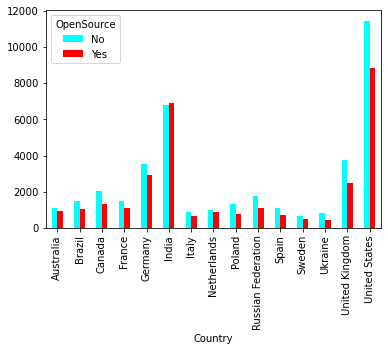

In [114]:
p=x[x["Country"].isin(x["Country"].value_counts().head(15).index)]
pd.crosstab(p["Country"],p["OpenSource"]).plot(kind="bar",color=["cyan","red"])

In [113]:
x[x["Country"].isin(x["Country"].value_counts().head(15).index)]

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
5,8,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
6,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98849,101478,No,Yes,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
98850,101513,Yes,Yes,United States,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
98851,101531,No,Yes,Spain,"Yes, full-time","Not employed, but looking for work",NaN,NaN,NaN,Back-end developer;Front-end developer,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
98852,101541,Yes,Yes,India,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN


<AxesSubplot:>

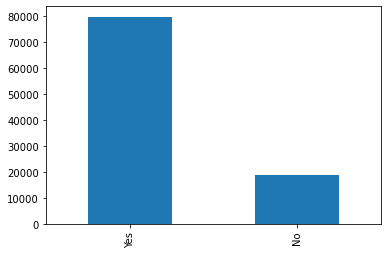

In [117]:
x["Hobby"].value_counts().plot(kind="bar")

<AxesSubplot:>

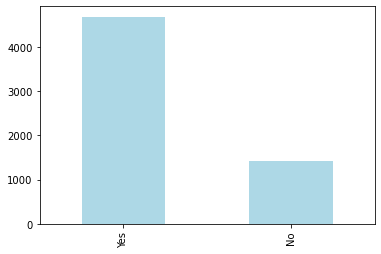

In [130]:
x[x["DevType"]=="Full-stack developer"]["Hobby"].value_counts().plot(kind="bar",color="lightblue")

In [134]:
x["DevType"].unique()

array(['Full-stack developer',
       'Database administrator;DevOps specialist;Full-stack developer;System administrator',
       'Engineering manager;Full-stack developer', ...,
       'Back-end developer;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Desktop or enterprise applications developer;Front-end developer;Mobile developer;Student;System administrator',
       'Back-end developer;Designer;Embedded applications or devices developer;Front-end developer;Game or graphics developer',
       'C-suite executive (CEO, CTO, etc.);Designer;Front-end developer;Product manager'],
      dtype=object)

In [135]:
def funtion(x):
    try:
        return x.split(";")
    except:
        return []

In [138]:
a=x["DevType"].apply(lambda x: funtion(x))

In [150]:
i=[]
for j in x["DevType"]:
    i.extend(funtion(j))

In [152]:
len(np.unique(i))

20

In [155]:
series=pd.Series(i).value_counts()

In [159]:
explode=np.zeros(len(series))

([<matplotlib.patches.Wedge at 0x1c609428670>,
 [Text(0.9038373438243784, 0.6269593734114617, 'Back-end developer'),
  Text(-0.1608845027598396, 1.0881710236776752, 'Full-stack developer'),
  Text(-0.9528813171467161, 0.5495609114854692, 'Front-end developer'),
  Text(-1.0958365853950482, -0.09561473793156341, 'Mobile developer'),
  Text(-0.9752648139529145, -0.5087814291671691, 'Desktop or enterprise applications developer'),
  Text(-0.7344517047598891, -0.8188899152971008, 'Student'),
  Text(-0.43009698411084635, -1.012431026914305, 'Database administrator'),
  Text(-0.1257674538372326, -1.0927865974449449, 'Designer'),
  Text(0.15373703722908755, -1.0892038025016357, 'System administrator'),
  Text(0.3946166764324354, -1.0267802484862176, 'DevOps specialist'),
  Text(0.5857761112060208, -0.9310565759073676, 'Data or business analyst'),
  Text(0.7321101244301803, -0.820984022808499, 'Data scientist or machine learning specialist'),
  Text(0.8473659301637089, -0.7014064302512435, 'QA 

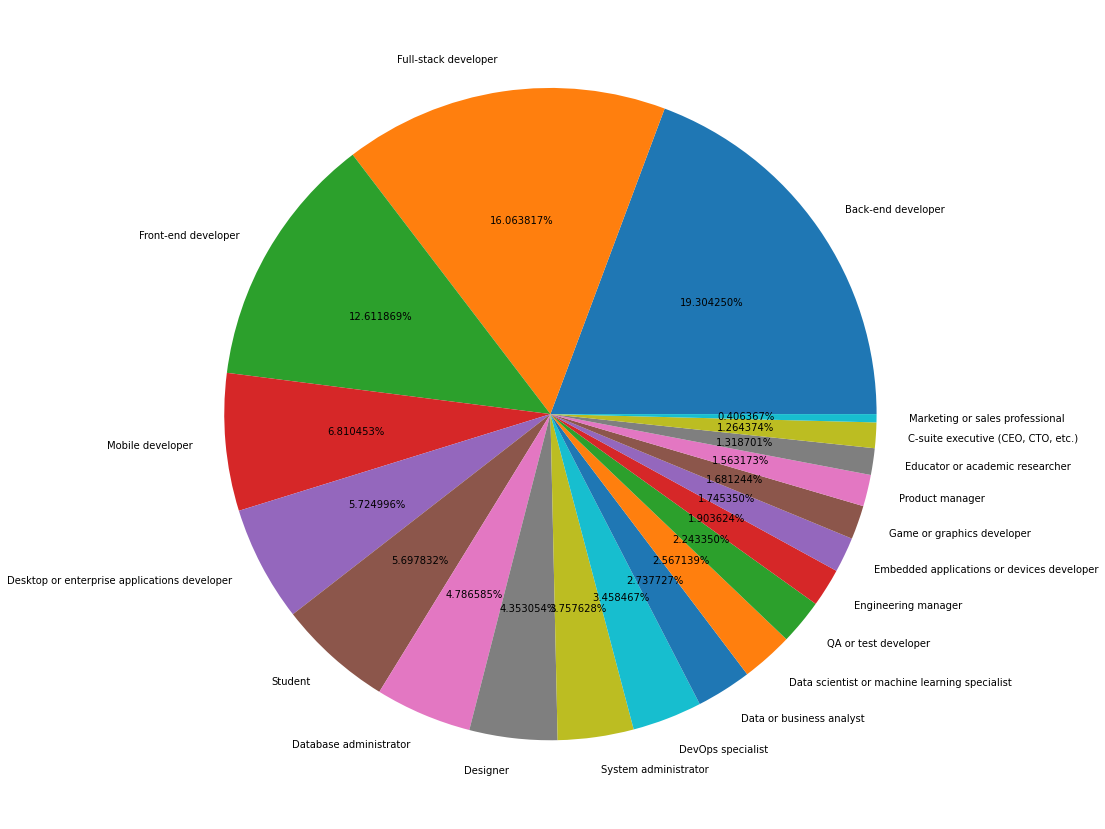

In [165]:
plt.figure(figsize=(15,15))
plt.pie(series,
    explode=None,
    labels=series.index,autopct="%2f%%")

In [175]:
def fun(n):
    try:
        return n.split(",")
    except:
        return []
z=x["Employment"].apply(lambda x: fun(x))
z

0                                     [Employed part-time]
1                                     [Employed full-time]
2                                     [Employed full-time]
3                                     [Employed full-time]
4                                     [Employed full-time]
                               ...                        
98850                                                   []
98851                [Not employed,  but looking for work]
98852                                 [Employed full-time]
98853    [Independent contractor,  freelancer,  or self...
98854                                                   []
Name: Employment, Length: 98855, dtype: object

In [176]:
p=[]
for j in x["Employment"]:
    p.extend(fun(j))

([<matplotlib.patches.Wedge at 0x1c624be8160>,
 [Text(-0.2376816787995266, 1.074014627257487, 'Employed full-time'),
  Text(-0.8499760808627217, -0.6982411202165397, 'Not employed'),
  Text(-0.42376708936001645, -1.0150967707442182, ' freelancer'),
  Text(0.08300622698997058, -1.0968636953974225, ' or self-employed'),
  Text(0.5717030492522999, -0.9397635997822126, 'Independent contractor'),
  Text(0.8813345263815938, -0.6582168735361713, ' but looking for work'),
  Text(1.0303780126262756, -0.38512485130971075, 'Employed part-time'),
  Text(1.0925621948999733, -0.12770219369827984, ' and not looking for work'),
  Text(2.099965170906198, -0.012094667457295873, 'Retired')],
 [Text(-0.12964455207246903, 0.5858261603222655, '56.932533%'),
  Text(-0.46362331683421176, -0.38085879284538526, '8.025230%'),
  Text(-0.23114568510546346, -0.5536891476786644, '7.496244%'),
  Text(0.045276123812711226, -0.5982892883985941, '7.496244%'),
  Text(0.31183802686489076, -0.512598327153934, '7.496244%'),

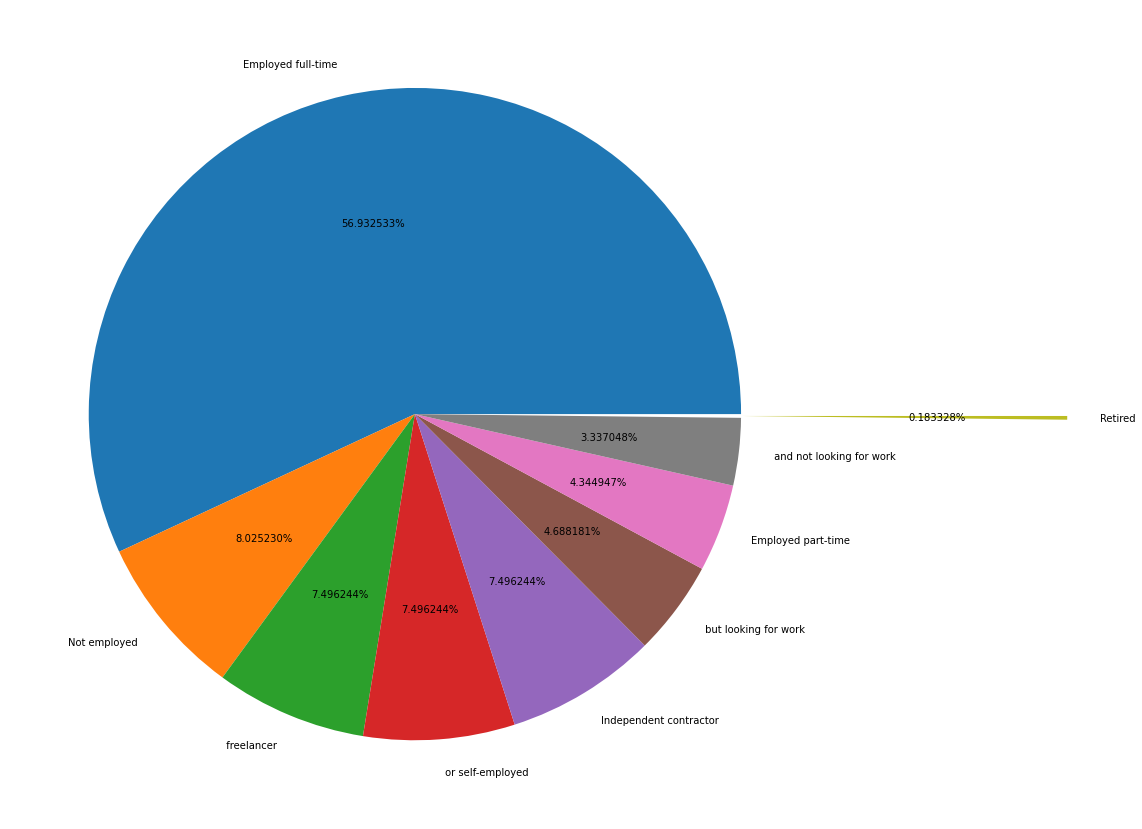

In [204]:
series=pd.Series(p).value_counts()
plt.figure(figsize=(15,15))
explode=np.zeros(len(series))
indices = series.index.isin(['Retired'])

explode[indices] = 1

plt.pie(series,labels=series.index,explode=explode,autopct="%2f%%")

In [206]:
x["Country"].isna().sum()

412

In [228]:
ind= x[x["Country"].isin(x["Country"].value_counts().head(10).index)]

<AxesSubplot:xlabel='Country'>

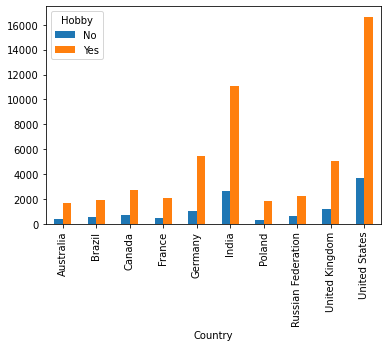

In [232]:
pd.crosstab(ind["Country"],ind["Hobby"]).plot(kind="bar")

In [237]:
typee=x[x["DevType"].isin(x["DevType"].value_counts().head(5).index)]

<AxesSubplot:xlabel='DevType'>

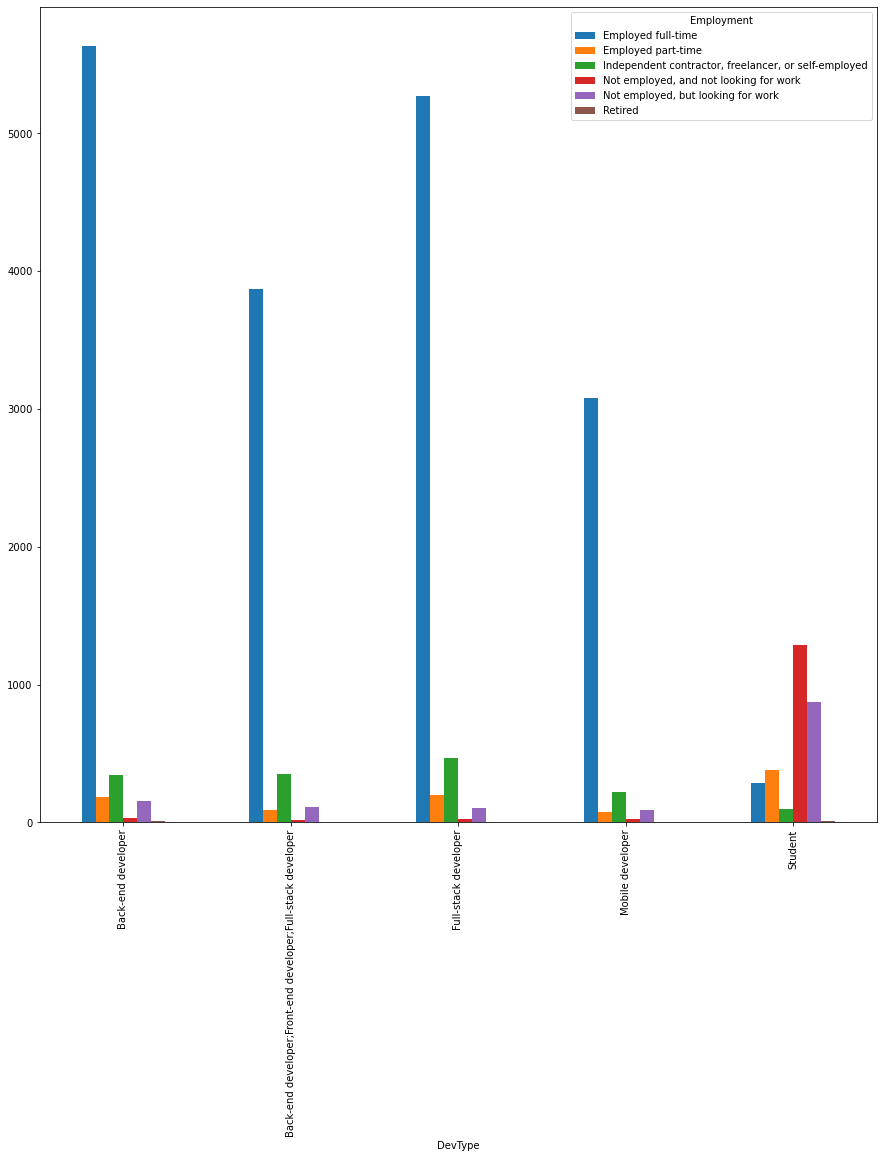

In [242]:

pd.crosstab(typee["DevType"],typee["Employment"]).plot(kind="bar",figsize=(15,15))

([<matplotlib.patches.Wedge at 0x1c6253a00d0>,
 [Text(-0.30553455034455995, 1.0567159687190062, 'No'),
  Text(-0.3908021164181302, -1.0282381561696252, 'Yes'),
  Text(0.7621252405636036, -0.7931992925462485, ' full-time'),
  Text(1.0858259118695837, -0.17601729776526925, ' part-time')])

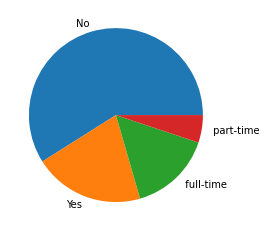

In [375]:
def functions(n):
    try:
        return n.split(",")
    except:
        return []
t=[]
for i in  x["Student"]:
    t.extend(functions(i))
series=pd.Series(t).value_counts()
plt.pie(series,labels=series.index )

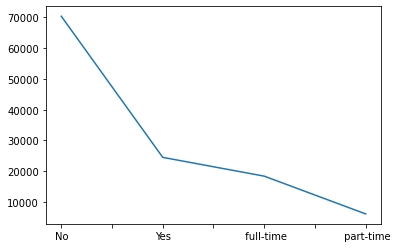

In [257]:
series=pd.Series(t).value_counts().plot()

In [263]:
a=x[x["DevType"].isin(['Data or business analyst', 'Data scientist or machine learning specialist'])]

<AxesSubplot:xlabel='DevType'>

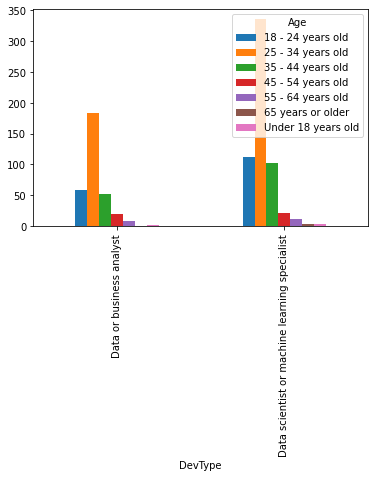

In [269]:
pd.crosstab(a["DevType"],a["Age"]).plot(kind="bar")

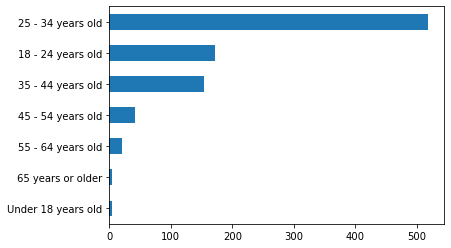

In [279]:
a["Age"].value_counts().plot.barh().invert_yaxis()

<AxesSubplot:xlabel='Age', ylabel='DevType'>

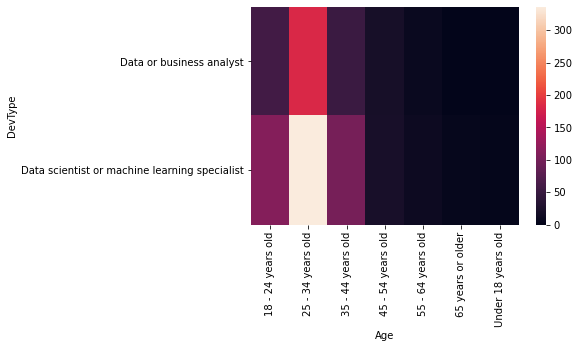

In [290]:
sns.heatmap(pd.crosstab(a["DevType"],a["Age"]))

In [327]:
x.loc[x["Country"].isin(x["Country"].value_counts().head(5).index),:]

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
5,8,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
6,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98847,101411,No,No,United States,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98848,101432,Yes,No,India,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98849,101478,No,Yes,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98850,101513,Yes,Yes,United States,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Country'>

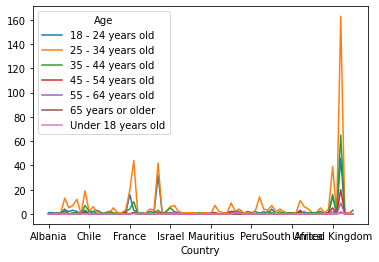

In [332]:
c=x.loc[x["DevType"].isin(['Data or business analyst', 'Data scientist or machine learning specialist']),:]
pd.crosstab(c["Country"],c["Age"]).plot()

In [382]:
salaries= c.loc[:,['Salary', 'SalaryType', 'Currency', 'ConvertedSalary']].dropna()

In [394]:
salaries

,Salary,SalaryType,Currency,ConvertedSalary
347,113000,Yearly,U.S. dollars ($),113000.0
393,2500,Monthly,Euros (€),36720.0
576,34000,Yearly,Euros (€),41612.0
618,30000,Yearly,U.S. dollars ($),30000.0
802,300000,Yearly,U.S. dollars ($),300000.0
...,...,...,...,...
82963,1200000,Yearly,Indian rupees (₹),18785.0
84404,0,Yearly,Euros (€),0.0
84486,180000,Yearly,U.S. dollars ($),180000.0
86584,3000,Monthly,Euros (€),44064.0


In [395]:
salaries["SalaryType"].value_counts()

Yearly     378
Monthly    179
Weekly      18
Name: SalaryType, dtype: int64

In [412]:
salaries["Monthly_salary"]=salaries["ConvertedSalary"] 
for i in salaries.index:
    if salaries.loc[i,"SalaryType"]=="Yearly":
        salaries.loc[i,"Monthly_salary"]=salaries.loc[i,"ConvertedSalary"]/12
    elif salaries.loc[i,"SalaryType"]=="Weekly":
        salaries.loc[i,"Monthly_salary"]=salaries.loc[i,"ConvertedSalary"]*4
    

In [409]:
plt.subplot()

,Salary,SalaryType,Currency,ConvertedSalary,Monthly_salary
347,113000,Yearly,U.S. dollars ($),113000.0,9416.666667
393,2500,Monthly,Euros (€),36720.0,36720.000000
576,34000,Yearly,Euros (€),41612.0,3467.666667
618,30000,Yearly,U.S. dollars ($),30000.0,2500.000000
802,300000,Yearly,U.S. dollars ($),300000.0,25000.000000
...,...,...,...,...,...
82963,1200000,Yearly,Indian rupees (₹),18785.0,1565.416667
84404,0,Yearly,Euros (€),0.0,0.000000
84486,180000,Yearly,U.S. dollars ($),180000.0,15000.000000
86584,3000,Monthly,Euros (€),44064.0,44064.000000


E:\Anacondafiles\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly_salary', ylabel='Density'>

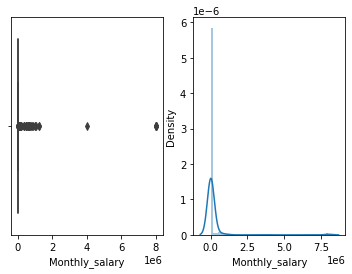

In [424]:
fig,ax=plt.subplots(1,2)
sns.boxplot(salaries["Monthly_salary"],ax=ax[0] )
sns.distplot(salaries["Monthly_salary"],ax=ax[1])

In [433]:
salaries["Monthly_salary"].apply(lambda x: format(x,".0f"))

347       9417
393      36720
576       3468
618       2500
802      25000
         ...  
82963     1565
84404        0
84486    15000
86584    44064
86871        0
Name: Monthly_salary, Length: 575, dtype: object

In [425]:
x

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98850,101513,Yes,Yes,United States,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98851,101531,No,Yes,Spain,"Yes, full-time","Not employed, but looking for work",NaN,NaN,NaN,Back-end developer;Front-end developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98852,101541,Yes,Yes,India,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98853,101544,Yes,No,Russian Federation,No,"Independent contractor, freelancer, or self-em...",Some college/university study without earning ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
